In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
class BinaryFocalLoss(nn.Module):
    def __init__(self, alpha=0.5, gamma=2.0, reduction='mean'):
        super(BinaryFocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets, weights=1):
        # Ensure the inputs are in the correct range
        # p = torch.sigmoid(inputs)

        p=inputs
        ce_loss = F.binary_cross_entropy(inputs, targets, reduction="none")
        p_t = p * targets + (1 - p) * (1 - targets)

        F_loss = ce_loss * ((1 - p_t) ** self.gamma)
        F_loss = F_loss.reshape(-1)
        if self.reduction == 'mean':
            return torch.mean(F_loss)
        elif self.reduction == 'sum':
            return torch.sum(F_loss)
        else:
            return F_loss

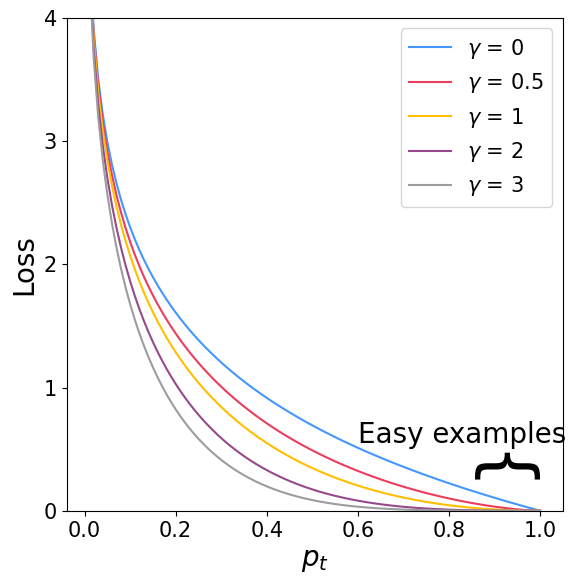

In [69]:
from matplotlib import patches
colors = [
    # "#000000",  # black
"#4497FF",
"#EC3D5D",
"#ffbf00",
"#964A8B",
"#9C9CA1",
"#7A21DD",


]
fig,ax=plt.subplots(figsize=(6.4,6.4))
x = torch.linspace(0.01, 1, 100)

for gamma,color in zip([0, 0.5, 1,2,3],colors):
    y = BinaryFocalLoss(gamma=gamma,reduction=None)(x, torch.ones_like(x))
    plt.plot(x.numpy(), y.numpy(), label=r"$\gamma$ = "+str(gamma),color=color)
    plt.legend(fontsize=15)
    import os
os.makedirs("../plots/focal",exist_ok=True)
plt.yscale("log")
plt.xlabel(r"$p_t$",fontsize=20)
plt.ylabel("Loss",fontsize=20)
plt.ylim(1e-4,5)
plt.savefig("../plots/focal/focal_log.pdf",format="pdf")

plt.yscale("linear")
plt.ylim(0,4)
plt.yticks([0,1,2,3,4])
ax.tick_params(labelsize=15)
# Text annotation
plt.text(0.6, 0.55, 'Easy examples',  fontsize=20 ,transform=ax.transData)

plt.text(0.80, 0.06, '{', fontsize=50, rotation=270,transform=plt.gca().transAxes)

plt.savefig("../plots/focal/focal.pdf",format="pdf")
